In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Set up ImageDataGenerator for both training and validation data with a split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Normalizing the images and setting a 20% split for validation

# Training data generator
train_generator = datagen.flow_from_directory(
    'E:/COMP258 Assigments/Lab3/Dataset',  # Dataset path for training
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Specify this as the training subset
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    'E:/COMP258 Assigments/Lab3/Dataset',  # Dataset path for validation
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify this as the validation subset
)


Found 8834 images belonging to 2 classes.
Found 2208 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(200, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    # Additional layers as per the article's architecture
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Number of epochs as per the article
)


Epoch 1/10
276/276 [==============================] - 152s 543ms/step - loss: 0.2587 - accuracy: 0.9188 - val_loss: 0.1351 - val_accuracy: 0.9552
Epoch 2/10
276/276 [==============================] - 148s 535ms/step - loss: 0.1357 - accuracy: 0.9532 - val_loss: 0.1303 - val_accuracy: 0.9547
Epoch 3/10
276/276 [==============================] - 148s 534ms/step - loss: 0.1151 - accuracy: 0.9609 - val_loss: 0.2894 - val_accuracy: 0.9058
Epoch 4/10
276/276 [==============================] - 147s 534ms/step - loss: 0.0897 - accuracy: 0.9656 - val_loss: 0.1253 - val_accuracy: 0.9660
Epoch 5/10
276/276 [==============================] - 148s 535ms/step - loss: 0.0736 - accuracy: 0.9736 - val_loss: 0.1184 - val_accuracy: 0.9697
Epoch 6/10
276/276 [==============================] - 147s 533ms/step - loss: 0.0686 - accuracy: 0.9766 - val_loss: 0.1445 - val_accuracy: 0.9624
Epoch 7/10
276/276 [==============================] - 148s 536ms/step - loss: 0.0733 - accuracy: 0.9738 - val_loss: 0.1116 -

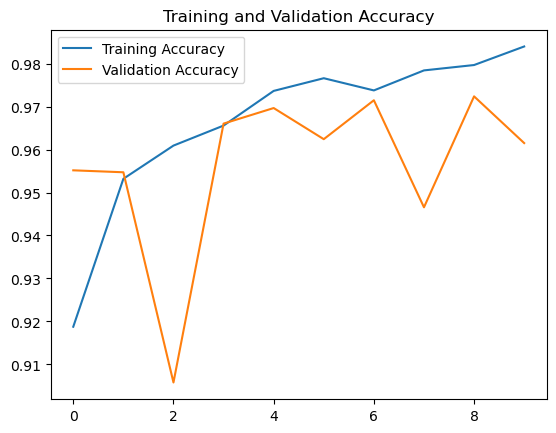

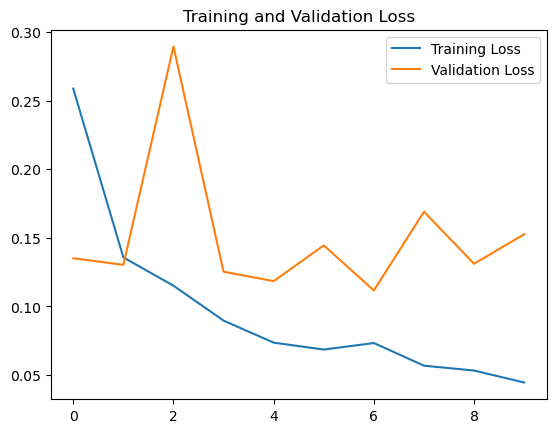

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [10]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")



69/69 [==============================] - 10s 148ms/step - loss: 0.1526 - accuracy: 0.9615
Validation Accuracy: 96.15%


1/1 [==============================] - 0s 71ms/step


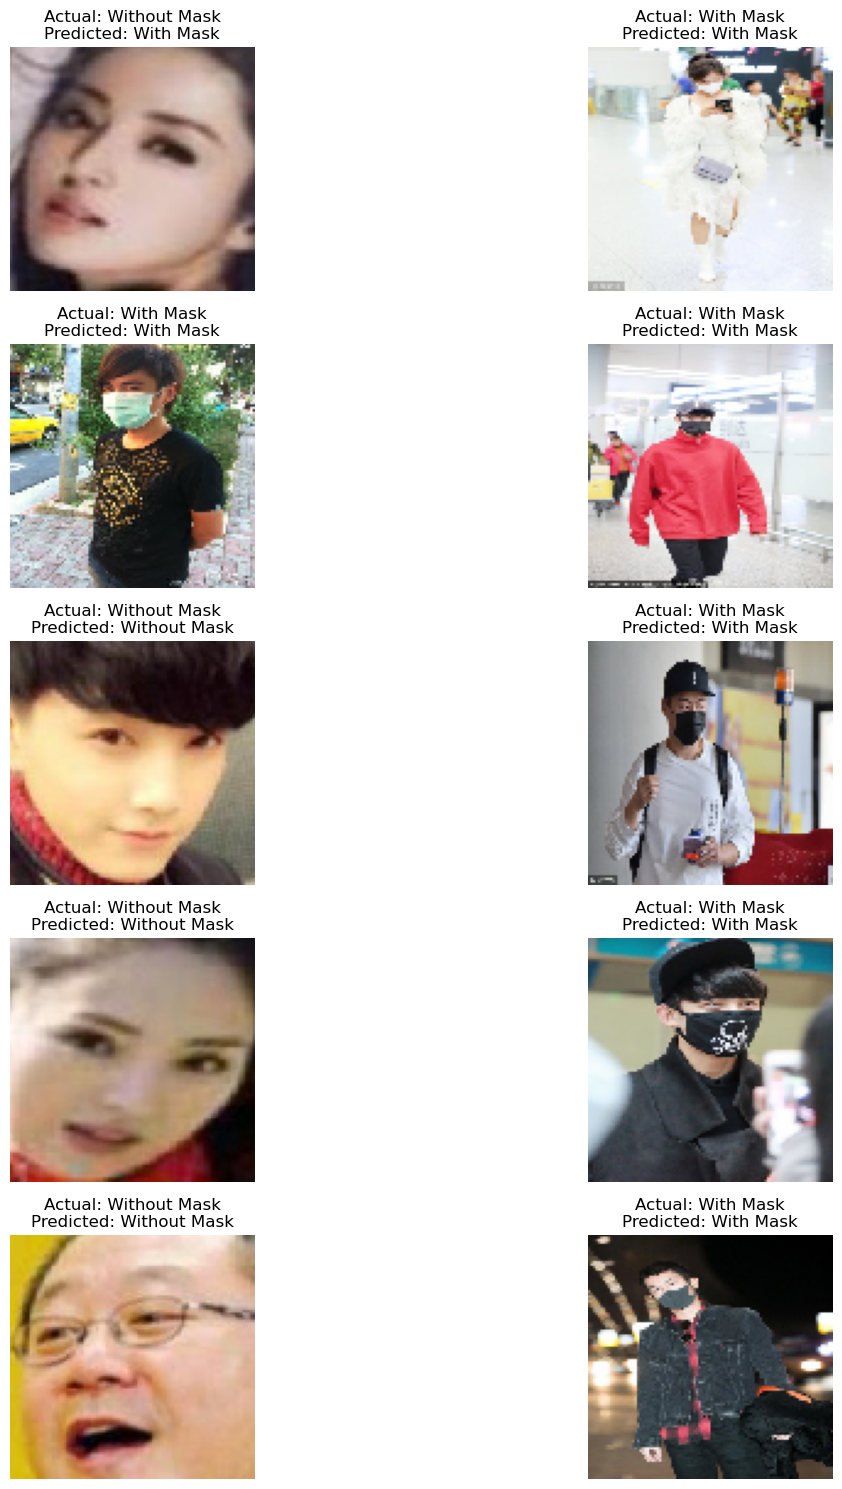

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve a batch of images from the validation set
val_images, val_labels = next(validation_generator)

# Get predictions
predictions = model.predict(val_images)
predictions = np.round(predictions).astype(int)  # Convert probabilities to binary predictions

# Define the number of images you want to display
num_images = 10

# Plot the images with their predicted and actual labels
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(5, 2, i + 1)
    plt.imshow(val_images[i])
    plt.title(f"Actual: {'Without Mask' if val_labels[i] == 1 else 'With Mask'}\nPredicted: {'Without Mask' if predictions[i][0] == 1 else 'With Mask'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

